In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import os
import itertools
import math
from sklearn import metrics
from random import randint
from matplotlib import style

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [2]:
def wrangle_circ():
    '''
    This function reads in curriculum.csv, writes data to
    a csv file if a local file does not exist, and returns a df
    '''
    filename = 'curriculum.csv'
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
        
    return df

In [3]:
df = wrangle_circ()
df.sample(10)

,id,name,start_date,end_date,program_id,date,time,path,user_id,ip
885432,134.0,Luna,2020-12-07,2021-06-08,2.0,2021-04-12,10:18:43,java-iii/servlets,825,45.131.192.127
631384,57.0,Ganymede,2020-03-23,2020-08-20,2.0,2020-08-07,11:07:25,spring/fundamentals/controllers,636,99.100.175.92
219841,17.0,Olympic,2017-02-06,2017-05-25,1.0,2019-03-15,13:07:28,java-i,168,24.243.59.138
141980,25.0,Wrangell,2018-07-23,2018-11-29,2.0,2018-10-17,15:07:19,java-iii/jdbc,256,97.105.19.58
812105,134.0,Luna,2020-12-07,2021-06-08,2.0,2021-02-05,09:22:19,jquery/ajax/requests-and-responses,820,70.125.135.252
719769,62.0,Jupiter,2020-09-21,2021-03-30,2.0,2020-11-03,09:40:56,examples/javascript/dom-query-js.html,774,76.237.209.204
166189,26.0,Xanadu,2018-09-17,2019-02-08,2.0,2018-12-06,11:26:23,mysql/group-by,263,97.105.19.58
215732,NaN,NaN,NaN,NaN,NaN,2019-03-08,10:56:30,4.0_overview,355,97.105.19.58
211918,28.0,Staff,2014-02-04,2014-02-04,2.0,2019-03-04,09:41:31,spring,11,97.105.19.58
578079,58.0,Hyperion,2020-05-26,2020-11-10,2.0,2020-06-18,15:52:46,javascript-i,658,100.19.73.35


In [4]:
df = df.dropna()

In [5]:
def overview(df):
    '''
    print shape of DataFrame, .info, and .describe
    parameters: single pandas dataframe, df
    return: none
    '''
    print('--- Shape: {}'.format(df.shape))
    print('____________________________________________________')
    print('--- Info')
    df.info()
    print('____________________________________________________')
    print('--- Column Descriptions')
    print()
    print(df.describe())

In [6]:
overview(df)

--- Shape: (847329, 10)
____________________________________________________
--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 847329 entries, 0 to 900222
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          847329 non-null  float64
 1   name        847329 non-null  object 
 2   start_date  847329 non-null  object 
 3   end_date    847329 non-null  object 
 4   program_id  847329 non-null  float64
 5   date        847329 non-null  object 
 6   time        847329 non-null  object 
 7   path        847329 non-null  object 
 8   user_id     847329 non-null  int64  
 9   ip          847329 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 71.1+ MB
____________________________________________________
--- Column Descriptions

                  id     program_id        user_id
count  847329.000000  847329.000000  847329.000000
mean       48.501042       2.086003     456.707192
std  

In [7]:
df.path.value_counts().head(20)

/                                                                            45854
javascript-i                                                                 18203
toc                                                                          17591
search/search_index.json                                                     17534
java-iii                                                                     13166
html-css                                                                     13127
java-ii                                                                      12177
spring                                                                       11883
jquery                                                                       11041
mysql                                                                        10611
java-i                                                                       10467
javascript-ii                                                                10294
appe

In [8]:
df.name.nunique()

47

In [9]:
df.path.value_counts(normalize=True).sample(10)

classification/evaluation                                 0.000786
fundamentals/ml-methodologies-drawing.jpg                 0.000211
content/include-and-require.html                          0.000002
content/php_iii/include-and-require.html                  0.000032
anomaly-detection/time-series-anomaly-detection-part-1    0.000014
introduction/operators                                    0.000006
javascript-with-html                                      0.000022
refine                                                    0.000005
11.03_Explore.md                                          0.000004
6.3_Acquire                                               0.000018
Name: path, dtype: float64

In [10]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [11]:
path_df = value_counts_and_frequencies(df.path)
path_df.head(10)

,count,proba
/,45854,0.054116
javascript-i,18203,0.021483
toc,17591,0.020761
search/search_index.json,17534,0.020693
java-iii,13166,0.015538
html-css,13127,0.015492
java-ii,12177,0.014371
spring,11883,0.014024
jquery,11041,0.013030
mysql,10611,0.012523


<AxesSubplot:>

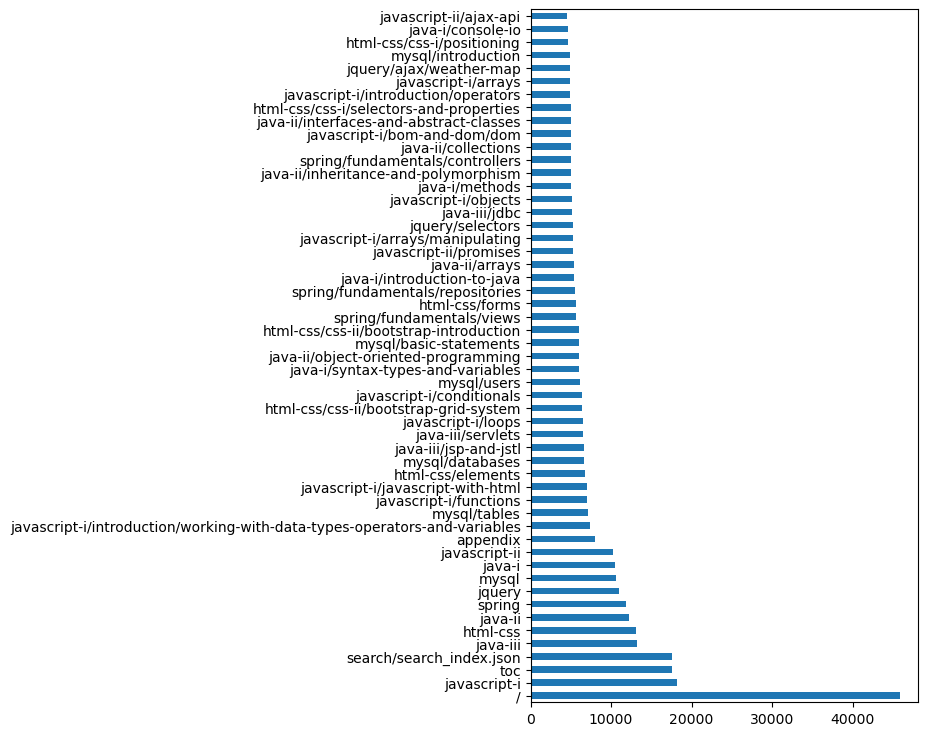

In [12]:
path_df['count'].head(53).plot.barh(figsize=(5, 9))

In [13]:
name_df = value_counts_and_frequencies(df.name)
name_df

,count,proba
Staff,84031,0.099172
Ceres,40730,0.048069
Zion,38096,0.044960
Jupiter,37109,0.043795
Fortuna,36902,0.043551
Voyageurs,35636,0.042057
Ganymede,33844,0.039942
Apex,33568,0.039616
Deimos,32888,0.038814
Darden,32015,0.037783


<AxesSubplot:>

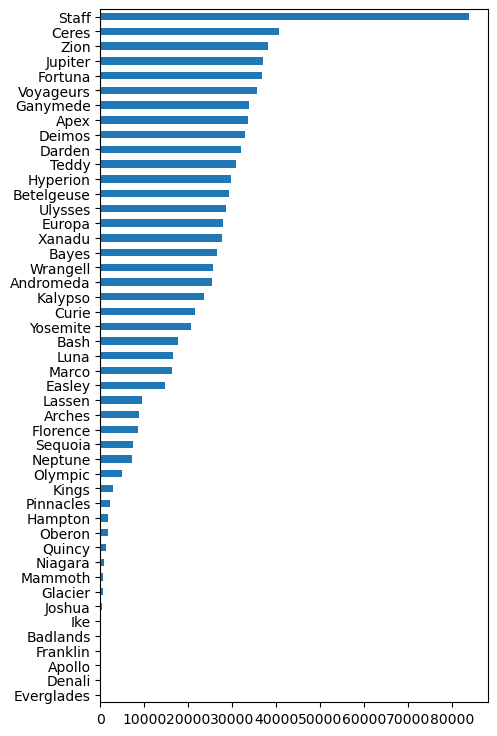

In [14]:
name_df['count'].sort_values().plot.barh(figsize=(5, 9))

In [15]:
df[['name','path']].groupby('path').value_counts()

path                              name     
%20https://github.com/RaulCPena   Curie         1
'                                 Staff         1
,%20https://github.com/RaulCPena  Curie         1
.git                              Voyageurs     1
.gitignore                        Voyageurs     1
                                               ..
where                             Florence      1
working-with-time-series-data     Darden       14
                                  Staff         1
wp-admin                          Teddy         1
wp-login                          Teddy         1
Length: 13565, dtype: int64

<AxesSubplot:xlabel='name'>

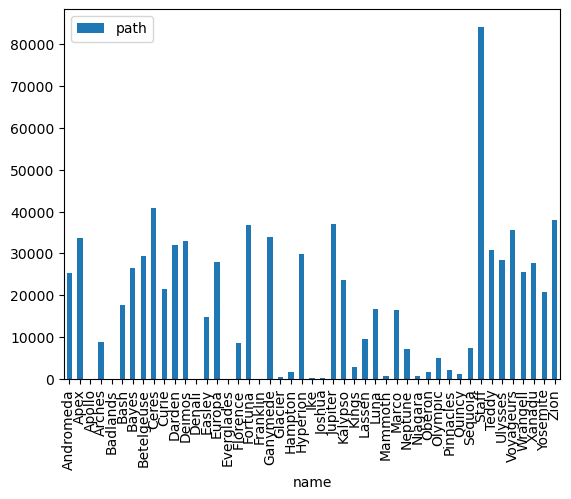

In [16]:
#pd.set_option('display.max_rows', None)
df[['name','path']].groupby('name').count().plot.bar(rot=90)

In [17]:
#df[['name','path']].groupby('path').value_counts().head(55)

In [18]:
#df[['name','path']].groupby('name').nunique().plot.bar(rot=90)

In [55]:
def Q_two(df):
    weird_df= df.groupby(['name', 'path']).agg('count')
    weird_df.sort_values(by= 'name', ascending= False)
    weird_df= weird_df.reset_index()
    weird_df= weird_df[weird_df.path != '/']
    count_df= weird_df[['name', 'path', 'ip']]
    count_df.sort_values(by= ['name', 'ip'], ascending= [False, False])
    new_df= count_df.sort_values(by= 'ip', ascending= False).groupby('name').nth(0)
    return new_df

In [106]:
new_df = Q_two(df)
new_df
# jupter apex zion ceres fortuna darden ganymede hyperion

,path,ip
name,,
Andromeda,toc,638
Apex,search/search_index.json,1497
Apollo,content/html-css,2
Arches,javascript-i,294
Badlands,content/php_ii/command-line,6
Bash,search/search_index.json,660
Bayes,1-fundamentals/modern-data-scientist.jpg,650
Betelgeuse,search/search_index.json,761
Ceres,search/search_index.json,1380


In [57]:
def plot_q2(df):
    ax = sns.scatterplot(data=new_df)
    plt.title('Lesson Vs Cohort?')
    plt.ylabel('Log Count')
    plt.xlabel('Cohorts')
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        bottom=False,      # ticks along the bottom edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax.annotate('Index.html/Jupiter Cohort', xy=(15.95, 1430), xytext=(3, 1250),
                arrowprops=dict(facecolor='black', shrink=0.09))
    ax.get_legend().remove()
    plt.show()

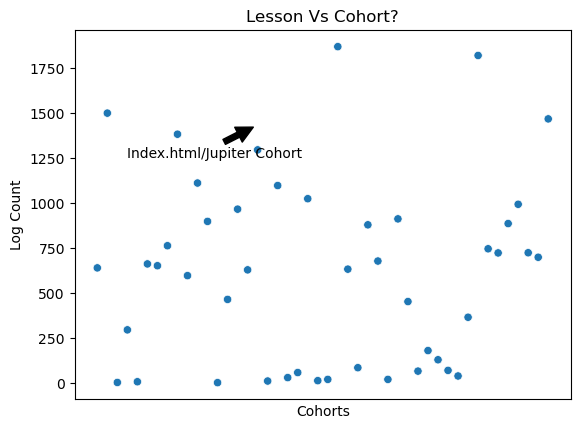

In [58]:
plot_q2(new_df)

In [75]:
pdf = new_df[['path']].value_counts()

In [80]:
pdf

path                                    
toc                                         10
javascript-i                                 9
search/search_index.json                     5
spring                                       3
content/html-css                             3
index.html                                   2
java-iii                                     1
prework/versioning/github                    1
mkdocs/search_index.json                     1
javascript-ii/es6                            1
javascript-i/introduction/operators          1
1-fundamentals/modern-data-scientist.jpg     1
6-regression/1-overview                      1
html-css                                     1
fundamentals/modern-data-scientist.jpg       1
content/php_ii/command-line                  1
content/laravel/intro                        1
classification/scale_features_or_not.svg     1
classification/overview                      1
java-i                                       1
dtype: int64